# 23/1/30(월요일)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
survey_raw_df = pd.read_csv("data/survey_results_public.csv", index_col = "ResponseId")
# survey_raw_df

In [3]:
schema_raw = pd.read_csv("data/survey_results_schema.csv", index_col = "qname")["question"] #col이 인덱스, ["qestion"]이 벨류 -> 시리즈 형태로
# schema_raw

In [4]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [5]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

In [6]:
schema_raw["CompTotal"]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [7]:
schema_raw["CompFreq"]

'Is that compensation weekly, monthly, or yearly?'

In [8]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [9]:
pd.set_option('display.max_columns', 78) #표현되는 칼럼 최대 개수, 78개로해줘

In [10]:
pd.set_option('display.max_rows', 78) #표현되는 로우 최대 개수, 78개로해줘

In [11]:
selected_columns = [
#인구통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
#프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
# 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

In [12]:
#위에 만든 리스트를 활용해 칼럼에 대해 배열 인덱싱
#얻어진 결과를 survey_raw_df로 부터 분리하여 작업하고자 -> copy()메서드로 새롭게 복사
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [13]:
print(schema_raw["YearsCode"])

Including any education, how many years have you been coding in total?


In [14]:
survey_df["YearsCode"].value_counts()

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

In [15]:
#칼럼(시리즈)이 nan값을 얼마나 갖는지 확인 위한 함수 만들기
##series를 인자로 갖는 count_nan험수 만들기
##이 함수는 인자로 전달된 시리즈의 nan개수를 반환

##함수는 꼭 재사용 가능하게 만들어야함

def count_nan(series): #처음부터 시리즈인 애들을 가져올거여서 series로 할당해주먄 됨
    return len(series) - series.count() #count()는 nan값제외하고 출력해줌
    
    
#처음에 내가 만든거    
# def count_nan(value): 
#     return len(survey_df["YearsCode"]) -survey_df["YearsCode"].count()    

In [16]:
count_nan(survey_df["YearsCode"])

1937

In [17]:


# survey_df.astype('float')   #inplace 가 없음




survey_df["YearsCode"].replace("Less than 1 year", 0 , inplace = True) #1년이하는 0으로 변경
survey_df["YearsCode"].replace("More than 50 years", 51 , inplace = True) #50년 초과는 51로 변경
survey_df["YearsCode"] = survey_df.YearsCode.astype("float") #이렇게 만들고 다시 해당칼럼에 넣어줘야함 -> 갱신해줘야함
                                                            #딕셔너리 형태로 변경가능한데 pandas에서 칼럼을 가져올땐 딕셔너리말고 지금코드처럼쓰기

survey_df.dtypes
# survey_df.YearsCode.unique()

#dtype으로 변환하는 예시 
# df = df.astype('float')  

# survey_df = df.astype({'YearsCode':'int'})


Country                    object
Age                        object
Gender                     object
EdLevel                    object
YearsCode                 float64
YearsCodePro               object
LanguageHaveWorkedWith     object
LanguageWantToWorkWith     object
LearnCodeCoursesCert       object
ProfessionalTech           object
SOAccount                  object
Employment                 object
DevType                    object
WorkExp                   float64
dtype: object

In [18]:
survey_df.YearsCode.unique()

array([nan, 14., 20.,  8., 15.,  3.,  1.,  6., 37.,  5., 12., 22., 11.,
        4.,  7., 13., 36.,  2., 25., 10., 40., 16., 27., 24., 19.,  9.,
       17., 18., 26., 51., 29., 30., 32.,  0., 48., 45., 38., 39., 28.,
       23., 43., 21., 41., 35., 50., 33., 31., 34., 46., 44., 42., 47.,
       49.])

In [19]:
#YearsCodePro는 교육기간을 포함하지 않음
##순수하게 일한 기간만을 나타내는 설문 항목
print(schema_raw["YearsCodePro"])

NOT including education, how many years have you coded professionally (as a part of your work)?


In [20]:
count_nan(survey_df["YearsCodePro"])

21435

In [21]:
survey_df["YearsCodePro"].value_counts()

3                     4261
5                     4057
2                     3945
4                     3884
10                    3333
6                     3184
7                     2760
8                     2646
1                     2644
Less than 1 year      1972
15                    1822
12                    1711
9                     1583
20                    1472
11                    1369
14                    1048
22                     933
16                     921
13                     914
25                     877
18                     787
17                     723
30                     568
23                     463
24                     454
21                     429
19                     380
26                     320
27                     286
35                     266
28                     254
32                     223
40                     175
29                     126
33                     122
31                     121
34                     113
3

In [22]:
survey_df["YearsCodePro"].replace("Less than 1 year", 0 , inplace = True) 
survey_df["YearsCodePro"].replace("More than 50 years", 51 , inplace = True) 
survey_df["YearsCodePro"] = survey_df.YearsCodePro.astype("float") 
                                                            
survey_df.YearsCodePro.unique()

array([nan,  5., 17.,  3.,  6., 30.,  2., 10., 15.,  4., 22., 20., 40.,
        9., 14., 21.,  7., 18., 25.,  8., 12., 45.,  1., 19., 28., 24.,
       11., 23.,  0., 32., 27., 16., 44., 26., 37., 46., 13., 31., 39.,
       34., 38., 35., 29., 42., 36., 33., 43., 41., 48., 50., 51., 47.,
       49.])

In [23]:
survey_df.YearsCodePro.value_counts() # == survey_df["YearsCodePro"].value_counts()

3.0     4261
5.0     4057
2.0     3945
4.0     3884
10.0    3333
6.0     3184
7.0     2760
8.0     2646
1.0     2644
0.0     1972
15.0    1822
12.0    1711
9.0     1583
20.0    1472
11.0    1369
14.0    1048
22.0     933
16.0     921
13.0     914
25.0     877
18.0     787
17.0     723
30.0     568
23.0     463
24.0     454
21.0     429
19.0     380
26.0     320
27.0     286
35.0     266
28.0     254
32.0     223
40.0     175
29.0     126
33.0     122
31.0     121
34.0     113
36.0     111
37.0     100
38.0      96
42.0      67
45.0      52
39.0      51
41.0      42
51.0      41
43.0      31
44.0      26
46.0      19
48.0      18
50.0      14
47.0      10
49.0       9
Name: YearsCodePro, dtype: int64

In [24]:
survey_df.describe()#값의 분포 확인

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


In [26]:
#less than 1 year, more than 50 years를 nan처리할거야!로 정했을 경우
##nan으로 처리하면서 수치 자료형으로 바꾼다면 to_numeric()메서드 사용
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')

In [31]:
schema_raw["Gender"]


'Which of the following describe you, if any? Please check all that apply.'

In [32]:
survey_df["Gender"].value_counts() #값에 ;이 있으면 둘 이상의 옵션이 포함된 값

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [34]:
#np.nan값이 섞인 시리즈 자료형에 특정 문자값이 포함되었는지 알고싶을 떄 : contains() -> 첫 인자로 포함된 것을 찾을 문자열에 넣어줌
#na키워드 인수를 활용하면 NaN값을 대신한 값을 넣어줄 수 있음

## 예시는 ;가 포함된 row를 NaN값으로 바꿔줌
## bool타입으로판단함 -> 비트 연산자로 시리즈 자료형의 벡터화 연산을 위해 true는 flase로 flase는 true로
survey_df.where(~(survey_df["Gender"].str.contains(";", na = False)), np.nan, inplace = True) #~는 비트연산자0, where이 bool타입이 False일떄만 인식해서  
                                                                                                #비트연산자로 flase지만 조건은 True로 만들어줌

In [149]:
#1개의 값만 선택한 선택지만 남은 것
survey_df["Gender"].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [38]:
%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9, 5)
mpl.rcParams['figure.facecolor'] = '#00000000'

## set_style() 메서드 : 그림의 스타일을 일괄 적용
## rcParams의 값도 필요에 따라 지정
 ### font.size : 기본 폰트  크기 적용
 ### figure.figsize : 기본 figure 사이즈 적용
 ### figure.facecolor : 기본 figure 내 배경 색상 흰색(#000000)으로 적용

In [41]:
import matplotlib.font_manager as font_manager



# Add every font at the specified location
font_dir = ['C:/python/fonts'] #폰트 설치 안하고 파일에 넣어 주기만 하면됨
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname = font).get_name()) #이름확인
    font_manager.fontManager.addfont(font) #추가

    
# Set font family globally    
mpl.rcParams['font.family'] = 'Gugi'
print(mpl.rcParams['font.family'])    

Gugi
['Gugi']


In [43]:
mpl.rcParams["font.family"] = "Gugi"
mpl.rcParams["axes.unicode_minus"] = False

##font.family : 기본 폰트 종류 적용
##axes.unicode_minus : False로 설정 시 마이너스 기호를 아스키로 함

In [48]:
#stack overflow


schema_raw['Country']
survey_df['Country'].unique()
survey_df['Country'].nunique() #country에 대한 유일한 값의 개수 확인, nan값은 포함X

180

In [56]:
count_c = survey_df["Country"].value_counts().head(15)

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

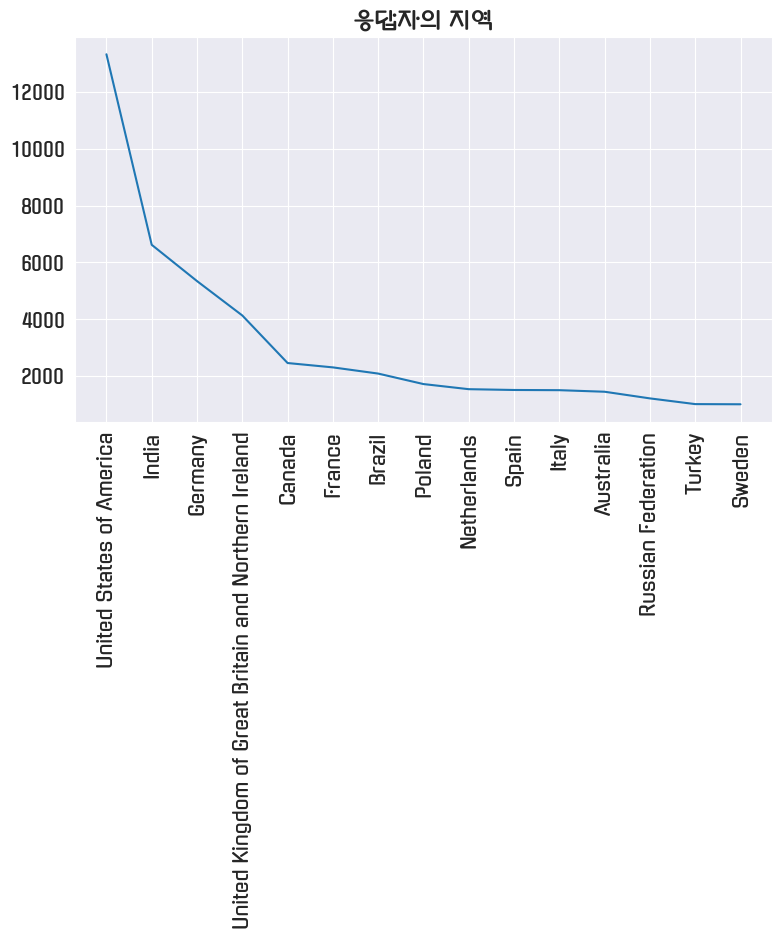

In [92]:
#연습
plt.title("응답자의 지역")
plt.plot(count_c)
# sns.barplot(data = count_c, x = count_c[0])
# plt.hist(count_c)
plt.xticks(rotation = 90)

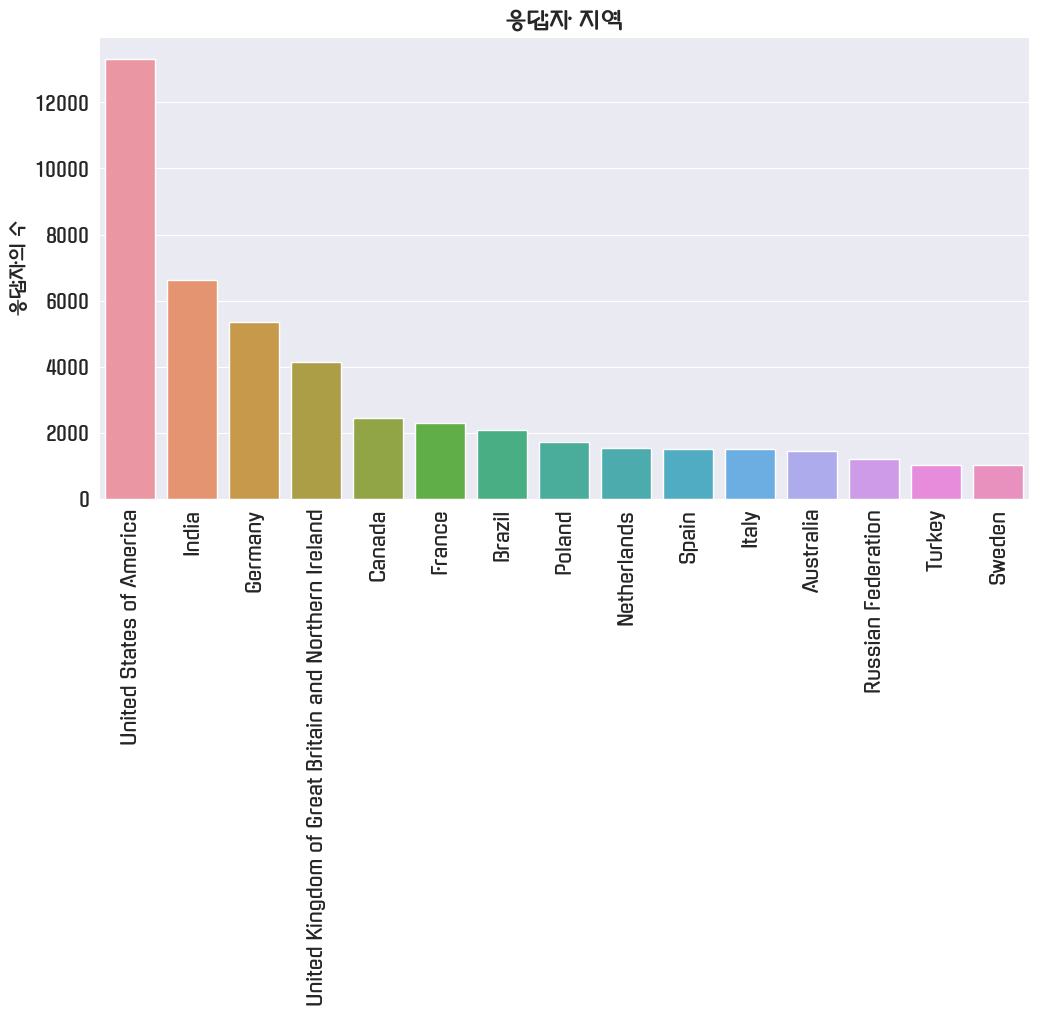

In [109]:
plt.figure(figsize = (12, 6)) #가로, 세로
plt.title("응답자 지역")
sns.barplot(x = count_c.index, y = count_c.values) #시리즈형태라 -> 시리즈변수.index, 시리즈변수.values로 주면 알아서 가져와짐
plt.xticks(rotation = 90) #반시계방향으로 90도 회전
plt.ylabel("응답자의 수")
plt.show()

In [111]:
count_nan(survey_df["Age"])

3011

In [121]:
age_counts = survey_df["Age"]
age_counts.value_counts()

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [114]:
survey_df["Age"].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [115]:
survey_df["Age"].nunique()

8

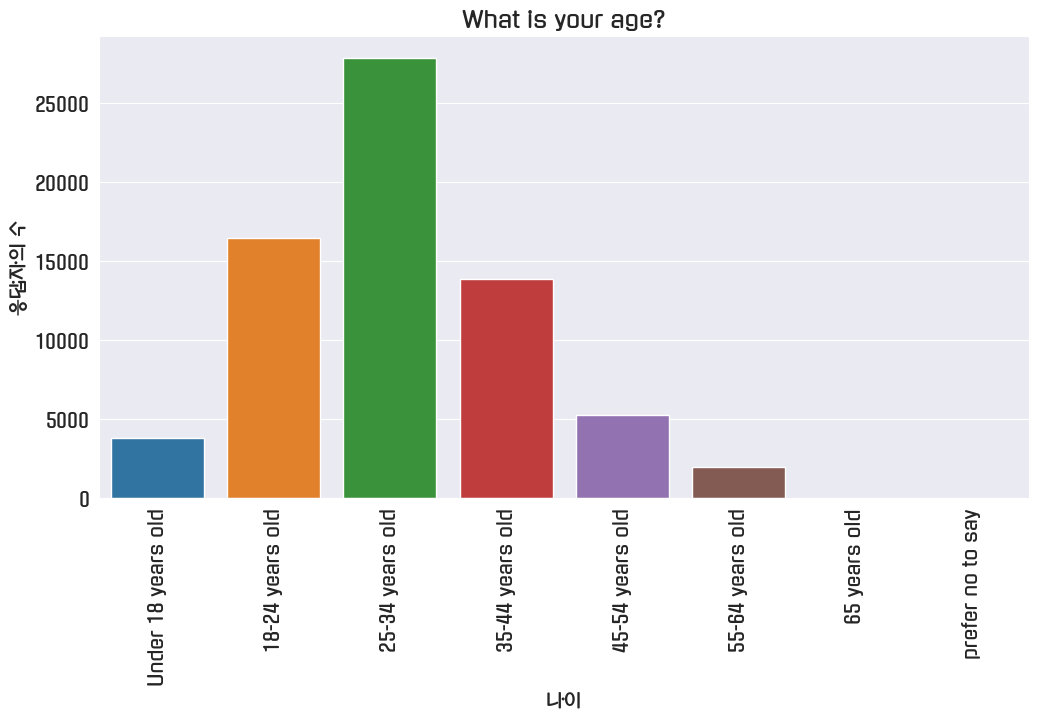

In [131]:
# plt.figure(figsize = (12, 6)) #가로, 세로
# plt.title("응답자 지역")
# sns.barplot(x = count_c.index, y = count_c.values) #시리즈형태라 -> 시리즈변수.index, 시리즈변수.values로 주면 알아서 가져와짐
# plt.xticks(rotation = 90) #반시계방향으로 90도 회전
# plt.ylabel("응답자의 수")
# plt.show()




#내가한코드
# plt.figure(figsize = (12, 8))
# plt.title("What is your age?")
# sns.barplot(x = age_counts.index, y = age_counts.values,
#             order = ["Under 18 years old", 
#                      "18-24 years old", 
#                      "25-34 years old", 
#                      "35-44 years old", 
#                      "45-54 years old", 
#                      "55-64 years old", 
#                      "65 years old", 
#                      "prefer no to say"])
# plt.xticks(rotation = 90)
# plt.ylabel("응답자의 수")
# plt.show()





#선생님코드
age_order = ["Under 18 years old",
             "18-24 years old", 
             "25-34 years old", 
             "35-44 years old", 
             "45-54 years old", 
             "55-64 years old", 
             "65 years old", 
             "prefer no to say"]
    
plt.figure(figsize = (12, 6))
plt.title("What is your age?")
plt.xticks(rotation = 90)
sns.countplot(data = survey_df, x = "Age" , order = age_order)
plt.xlabel('나이')
plt.ylabel('응답자의 수')
plt.show()

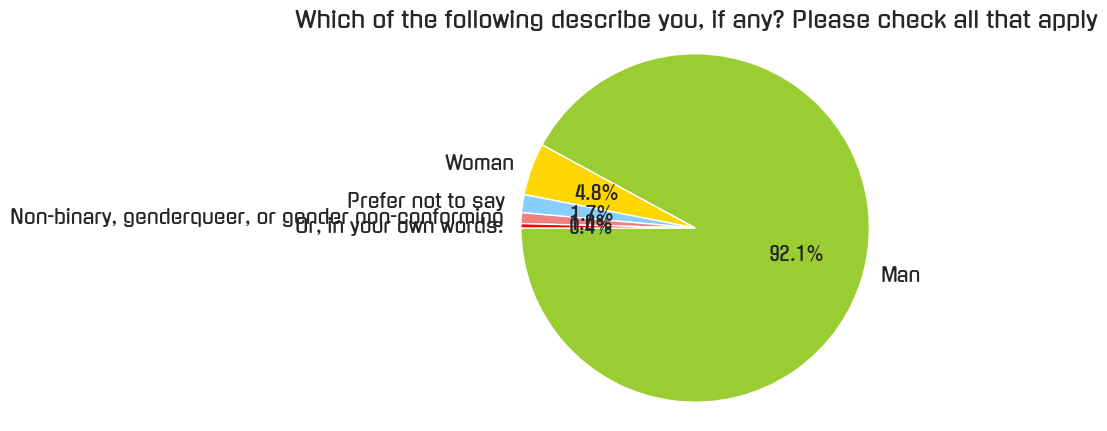

In [154]:
#연습
count_g = survey_df["Gender"].value_counts()

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']
labels = ['Man', 'Woman', 'Prefer not to say', 'Non-binary, genderqueer, or gender non-conforming', 'Or, in your own words:']


plt.title("Which of the following describe you, if any? Please check all that apply")
plt.pie(count_g, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 180)
plt.axis('equal')
plt.show()



#선생님코드
plt.figure(figsize = (12, 6))
plt.title
..........................................................................................

In [155]:
schema_raw['EdLevel']

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [156]:
survey_df["EdLevel"].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

C:\Users\playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8217 (\N{RIGHT SINGLE QUOTATION MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


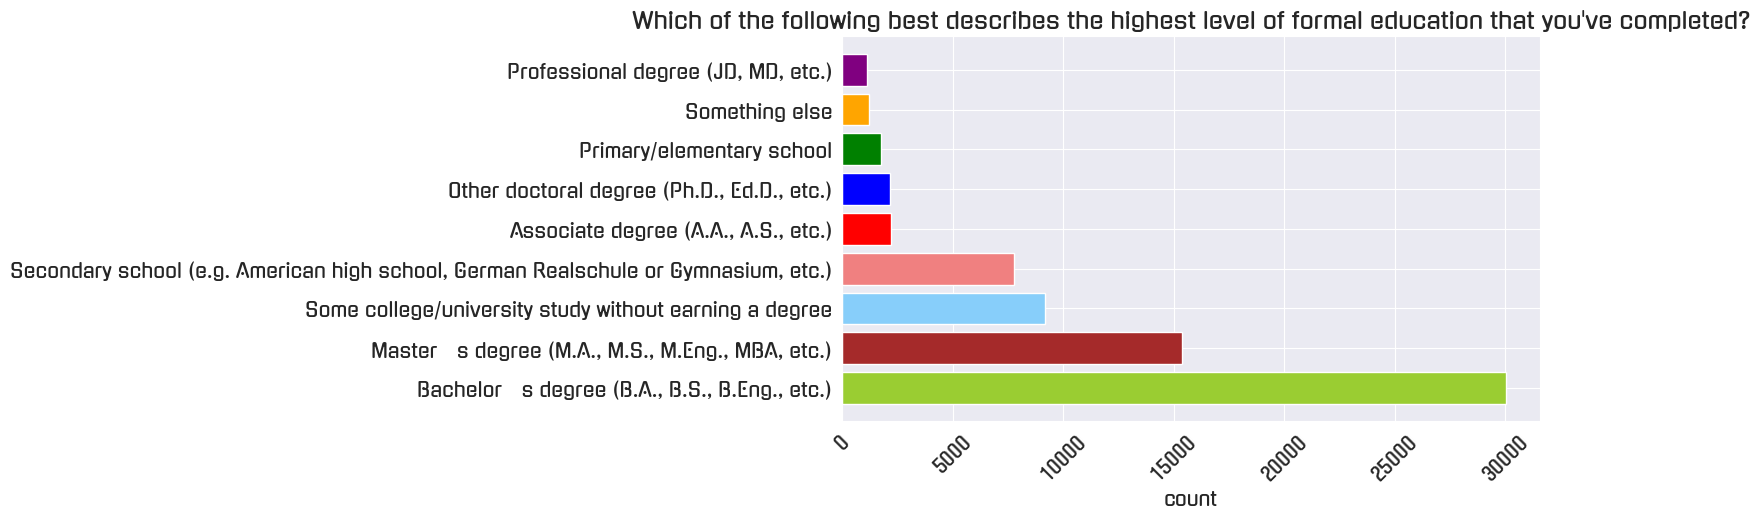

In [172]:
#연습
count_ed = survey_df["EdLevel"].value_counts()
color = ['yellowgreen', 'brown', 'lightskyblue', 'lightcoral', 'red', 'blue', 'green', 'orange', 'purple']


plt.title("Which of the following best describes the highest level of formal education that you've completed?")
plt.barh(count_ed.index, count_ed.values, color = color)
plt.xlabel("count")
plt.xticks(rotation = 45)
plt.show()

C:\Users\playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8217 (\N{RIGHT SINGLE QUOTATION MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


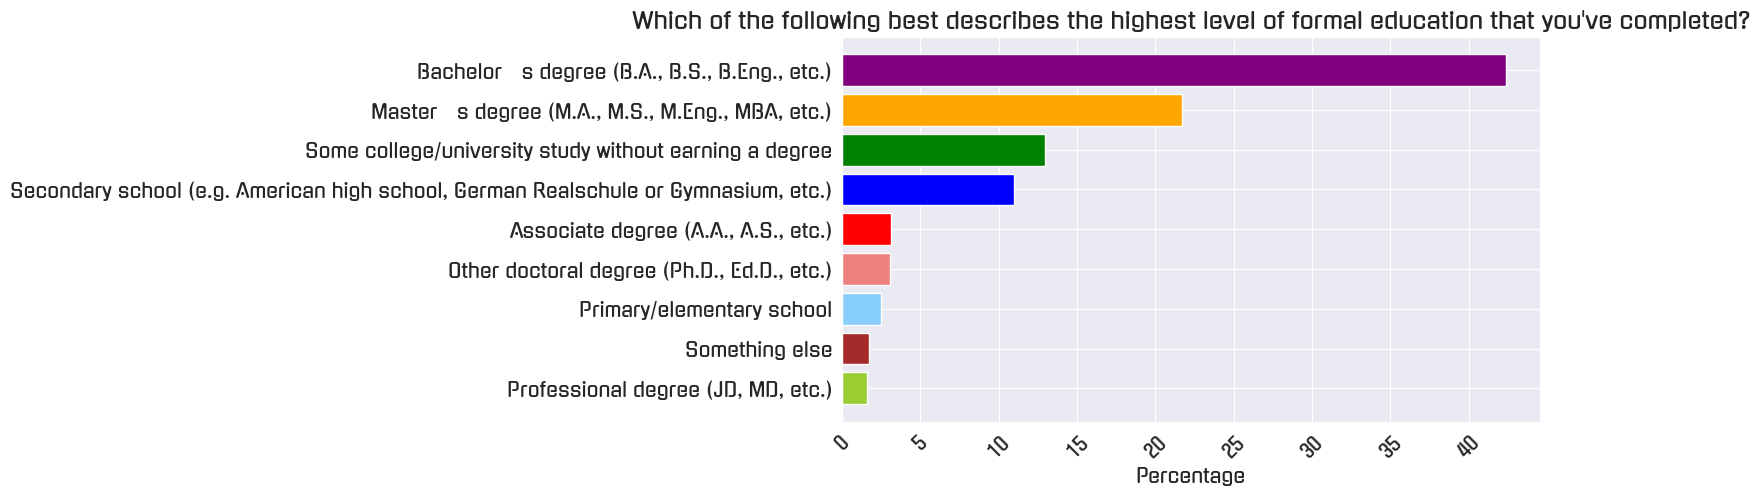

C:\Users\playdata\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8217 (\N{RIGHT SINGLE QUOTATION MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


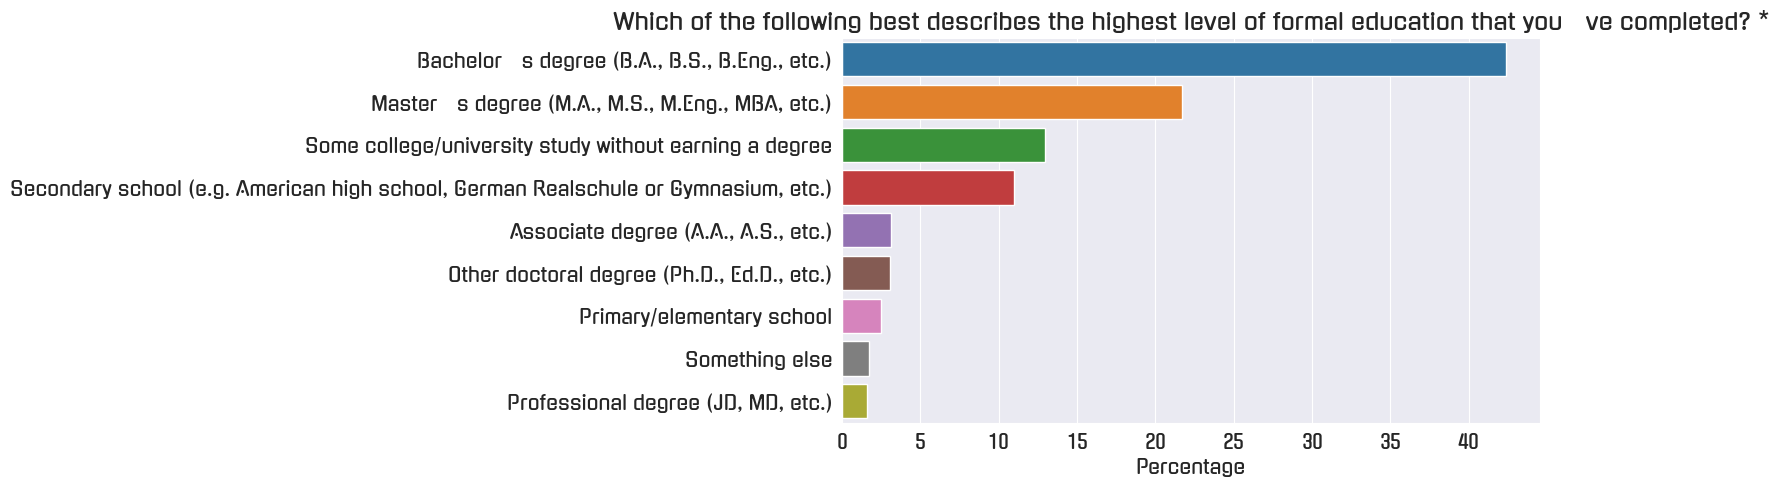

In [209]:
#연습
##y축 순서 고려하기
##x축단위 퍼센트로 변경
count_ed = survey_df["EdLevel"].value_counts().sort_values(ascending = True)
color = ['yellowgreen', 'brown', 'lightskyblue', 'lightcoral', 'red', 'blue', 'green', 'orange', 'purple']


plt.title("Which of the following best describes the highest level of formal education that you've completed?")
plt.barh(count_ed.index, count_ed.values/count_ed.values.sum() * 100, color = color)
plt.xticks(rotation = 45)
plt.xlabel("Percentage")
plt.show()



#선생님코드
EdLevel_pct = survey_df.EdLevel.value_counts(True) * 100
EdLevel_pct

sns.barplot(x = EdLevel_pct, y = EdLevel_pct.index)
plt.title(schema_raw["EdLevel"])
plt.ylabel(None);
plt.xlabel('Percentage');
          


In [224]:
schema_raw["Employment"]
survey_df["Employment"].value_counts().sort_values(ascending = True)

Student, part-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired                           1
Employed, full-time;Student, full-time;Student, part-time;Independent contractor, freelancer, or self-employed;Retired        1
Independent contractor, freelancer, or self-employed;Employed, part-time;Not employed, and not looking for work               1
Not employed, but looking for work;Employed, part-time;Retired                                                                1
Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Retired                           1
                                                                                                                          ...  
Not employed, but looking for work                                                                                         1810
Employed, full-time;Independent contractor, freelancer, or self-employed                                

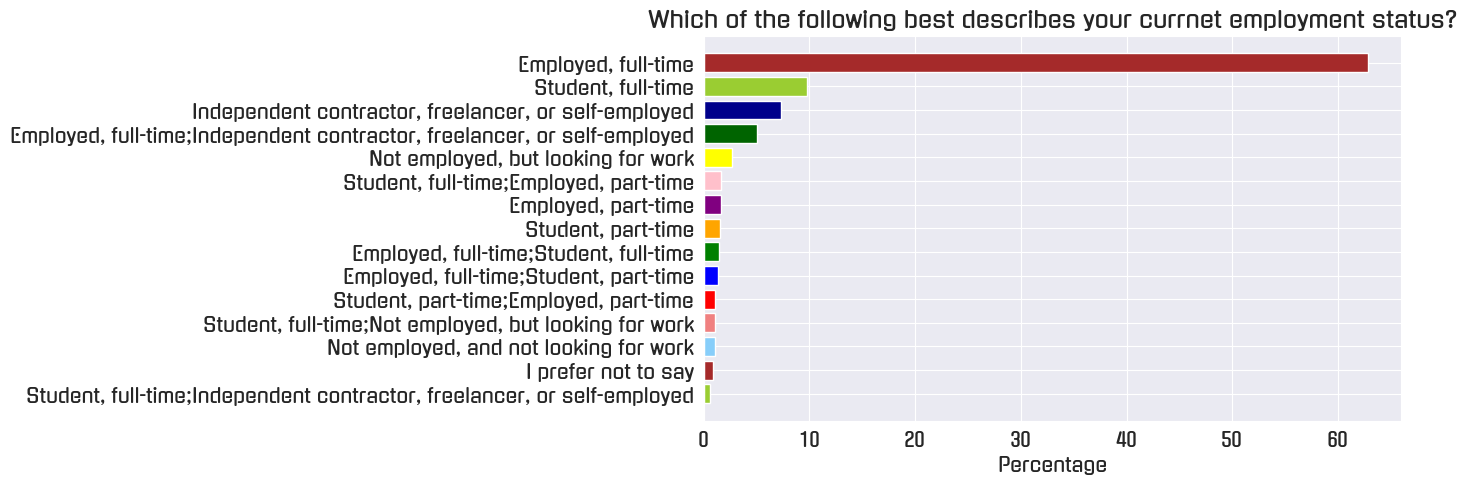

AttributeError: 'Index' object has no attribute 'head'

In [242]:
#연습
#내코드
count_s = survey_df["Employment"].value_counts().head(15).sort_values(ascending = True)
color = ['yellowgreen', 'brown', 'lightskyblue', 'lightcoral', 'red', 'blue', 'green', 'orange', 'purple', 'pink', 'yellow', 'darkgreen', 'darkblue']


plt.title("Which of the following best describes your currnet employment status?")
plt.barh(count_s.index, count_s.values/count_s.values.sum() * 100, color = color)
# plt.xticks(rotation = 4
plt.xlabel("Percentage")
plt.show()


#선생님코드
..........................................................................................
employment = (survey_df.Employment.value_counts(True, ascending = False) * 100
S

sns.barplot(x = S.values, y = S.index.head(15))
plt.title(schema_raw["Employment"])
plt.ylabel(None);
plt.xlabel('Percentage');
plt.show()

In [215]:

plt.title("Which of the following best describes the highest level of formal education that you've completed?")
plt.barh(count_ed.index, count_ed.values/count_ed.values.sum() * 100, color = color)
plt.xticks(rotation = 45)
plt.xlabel("Percentage")
plt.show()


qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object